# Introduction
In Part II, we went on a long journey to piece together the information in each cuisine and replicated the figures found in the "Data and Method" section.

In this Part, we will continue replicating the results found by the authors of the research paper in the "Results" section.

More specifically, you will:
1. Prepare a TF-IDF vector of ingredient usage across recipes
2. Perform Principal Component Analysis (PCA) for dimensionality reduction on the dataset
3. 

<font color = 'red'><strong>Disclaimer: there will be sections where we won't be able to replicate entirely, but that is ok because of variation in coding language used and ambiguity in source instructions. For most parts, the conclusions are consistent and valid.</strong></font>

### Step 1: Import libraries
For this Part, these are the libraries we need:
- pandas as pd
- glob
- matplotlib.pyplot as plt
- seaborn as sns
- numpy as np
- TfidfVectorizer from sklearn.feature_extraction.text
- PCA from sklearn.decomposition

In [1]:
# Step 1: Import libraries
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 

### Step 2: Get a list of filenames in 'cuisine_recipe_ingredient_CSV' folder
Similar to the last Part's Step 2, we'll need to get a list of all the .csv files in the 'cuisine_recipe_ingredient_CSV' folder using glob.


In [2]:
# Step 2: Get a list of .CSV filenames
FileList = glob("/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/*.csv")
FileList

['/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/sucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/xibeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yuecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/other.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/lucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/dongbeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hubeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/qingzhencai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/jiangxicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/zhecai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuis

## Replicate Figure 5
We'll start with replicating Figure 5, the first result in the "Results" section.

![Figure5](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/Figure5.png)

Here, the authors created a TF-IDF based ingredient matrix and performed Principal Component Analysis (PCA) for plotting.

We'll do the following:
1. Read the CSVs and get a list containing ingredients from each cuisine
2. Join each list of cuisine ingredient into a string
3. Create a DataFrame with the string version of the ingredient
4. Perform vectorization with TfidfVectorizer
5. Perform PCA
6. Plot the PCA components

![Figure5Approach](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure5Approach.png)

### Step 3: Get a list of list of ingredients
Loop through the filenames from Step 2, read the corresponding CSVs into DataFrame, and append the 'ingredient' column into a list.

Your list should only have 20 items.

In [3]:
# Step 3: Get a list of list of ingredients
LOI = []
for i in FileList:
    table = pd.read_csv(i)
    LOI.append(list(table['ingredient']))
    
len(LOI)

20

### Step 4: Get a list of cuisine names
We'll need a list of the cuisine names, so derive a list containing the cuisine names from the list in Step 2.

Alternatively, you can also manually declare a list containing the cuisine names.

In [4]:
# Step 4: Get a list of cuisine names

import re

def extract(filename):
    return re.search('[a-z]+\.csv', str(filename)).group(0).replace('.csv','')
    
CuisineNames=[extract(f) for f in FileList]
CuisineNames

['sucai',
 'xibeicai',
 'yuecai',
 'other',
 'yucai',
 'lucai',
 'dongbeicai',
 'hubeicai',
 'qingzhencai',
 'jiangxicai',
 'zhecai',
 'hucai',
 'shanxicai',
 'jingcai',
 'mincai',
 'huicai',
 'xiangcai',
 'chuancai',
 'yunguicai',
 'gangtai']

### Step 5: Join the items in each list
We will then join the items in each list into a string, and append the strings into a new list.

![IngredientTextExample](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/IngredientTextExample.png)

You will have a list containing 20 strings of ingredient ids.

In [5]:
# Step 5: Join the items in each list
StrIngredients = []
for i in LOI:
    StrIngredients.append(' '.join(map(str, i)))

print(len(StrIngredients))
StrIngredients

20


['250 143 165 359 286 14 102 181 4 263 12 21 55 318 91 37 13 2273 97 2274 40 43 437 25 860 17 4 427 13 280 12 28 419 20 2 46 43 147 174 44 19 36 12 37 11 21 22 33 4 14 117 624 437 530 44 264 280 12 4 14 13 10 91 20 134 437 25 44 280 12 19 22 1151 13 34 4 14 2275 2276 43 11 4 14 12 13 163 62 881 12 60 14 129 11 33 4 553 45 1437 114 268 113 10 91 4 14 129 928 58 53 2 36 54 505 10 116 102 12 13 55 17 432 44 237 91 324 75 13 2277 281 847 33 13 10 116 12 1111 2278 4 14 10 91 33 523 13 129 757 2279 44 701 237 91 116 12 22 167 2280 24 77 17 16 264 1537 48 93 4 14 12 280 1151 20 24 54 237 672 1325 12 34 13 167 22 1482 24 36 4 14 12 37 11 21 22 285 60 116 280 10 129 4 14 860 173 205 12 13 10 60 4 14 852 11 4 14 91 33 10 2037 2 1612 10 12 177 91 888 4 14 171 437 4 14 55 12 401 13 11 43 2281 675 14 34 12 13 91 28 2282 196 379 4 14 280 12 43 320 22 13 20 51 755 113 12 10 91 4 14 134 203 216 19 256 14 2283 17 54 12 280 1151 22 287 237 34 285 147 174 11 22 12 13 4 427 2284 25 1849 14 4 128 10 22 106

### Step 6: Create a DataFrame for cuisine name and text
Combine the two lists you created in Steps 4-5 to create a DataFrame.

![IngredientTextDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/IngredientTextDataFrame.png)

It should have:
- 20 rows
- 2 columns

In [6]:
# Step 6: Create an ingredient text DataFrame
CuisineText = pd.DataFrame({'cuisine':CuisineNames, 'text':StrIngredients})
CuisineText

,cuisine,text
0,sucai,250 143 165 359 286 14 102 181 4 263 12 21 55 ...
1,xibeicai,942 25 44 54 587 35 181 10 91 12 22 128 21 238...
2,yuecai,361 1592 281 36 101 4 12 33 10 247 1001 2569 2...
3,other,2 91 13 12 10 4 14 268 277 129 222 12 91 10 26...
4,yucai,16 221 114 530 547 155 437 468 266 53 1025 103...
5,lucai,19 91 281 266 17 43 25 12 13 45 379 16 44 264 ...
6,dongbeicai,876 547 19 292 54 144 256 18 125 10 55 101 33 ...
7,hubeicai,43 2 187 507 437 25 156 44 19 241 22 53 45 20 ...
8,qingzhencai,62 292 54 11 10 13 91 4 14 102 129 7 12 56 219...
9,jiangxicai,350 44 103 13 11 91 20 12 111 2 927 148 174 17...


### Step 7: Vectorize 'text' column with TfidfVectorizer
We'll turn the column of text into a DataFrame containing the TF-IDF scores of each ingredient. 

In the context of our project, important and unique ingredients will get a higher score compared to ingredients that are found in recipes across many cuisines.

After TF-IDF vectorization with the TfidfVectorizer object, you'll get a sparse matrix.

Turn that matrix into a DataFrame that contains:
- 20 rows
- 2,902 columns

P.S. You might have noticed something odd by now, but we'll talk about that in the Optional Step below later.

<details>
    <summary><strong>Click here once for a hint</strong></summary>
    <div>Google "Append tfidf to pandas dataframe"</div>
</details>

In [7]:
# Step 7: Get a DataFrame of the vectorized ingredients
import scipy.sparse
v = TfidfVectorizer()
vTrans = v.fit_transform(CuisineText['text'])
tfidf = pd.DataFrame.sparse.from_spmatrix(data=vTrans, columns=v.get_feature_names())
tfidf

,10,100,1000,1001,1002,1003,1004,1005,1006,1007,...,990,991,992,993,994,995,996,997,998,999
0,0.210581,0.006217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008040,0.000000,...,0.000000,0.00000,0.000000,0.004020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.239404,0.000000,0.000000,0.005713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.169043,0.001558,0.000000,0.004674,0.000000,0.000000,0.000000,0.000000,0.002015,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.004356,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.175651,0.021855,0.000000,0.021855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.030552,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.240476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.190269,0.000000,0.000000,0.000981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.235457,0.038452,0.006165,0.006409,0.008959,0.006165,0.010838,0.006165,0.004144,0.006165,...,0.004890,0.01233,0.005419,0.008288,0.004479,0.006165,0.006165,0.006165,0.006165,0.006165
7,0.200523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.010364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.227514,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.237922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Step 8: Perform PCA on the TF-IDF DataFrame
Now that you've obtained the vectorized ingredient DataFrame, it's time to perform principal component analysis to reduce the dimensions of the data, from 2,000+ columns to only 2 columns/components.

![PCAArrays](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/PCAArrays.png)

You should get values close to the ones above after PCA.

In addition, your components should account for 40.2% of the variance in the data when you call .explained_variance_ratio. 

In [8]:
# Step 8a: Declare a PCA object with n_components of 2
pca = PCA(n_components=2)

In [9]:
# Step 8b: Fit transform the DataFrame from Step 7
pca2 = pca.fit_transform(tfidf.sparse.to_dense())
pca2

array([[-0.05521221, -0.12772219],
       [-0.04578954,  0.07742115],
       [ 0.09340073, -0.12572037],
       [ 0.14009227, -0.01597528],
       [-0.18574527, -0.06043847],
       [-0.08585059,  0.08740583],
       [-0.02372451,  0.10808126],
       [-0.07413634, -0.04392283],
       [-0.14871006,  0.11002644],
       [-0.12495355,  0.07499872],
       [-0.09801108, -0.15038698],
       [-0.05947549, -0.13123118],
       [-0.11835331,  0.19409666],
       [-0.10062008,  0.03441156],
       [ 0.07358465, -0.22795304],
       [ 0.10744622, -0.11284322],
       [-0.08490725,  0.0155224 ],
       [-0.01101111,  0.08391558],
       [ 0.36724494,  0.36462411],
       [ 0.43473158, -0.15431017]])

In [10]:
# Step 8c: Check the sum of the .explained_variance_ratio
pca.explained_variance_ratio_

array([0.22738285, 0.17504549])

### Step 9: Turn the PCA array into a DataFrame
Now that you have the PCA array, we'll have to tidy it up into a proper DataFrame so we can plot and annotate the data nicely. 

More specifically, aim for a DataFrame that looks like this:

![PCADataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/PCADataFrame.png)

In [11]:
# Step 9: Create a DataFrame using the PCA array
import operator
PCAdf = pd.DataFrame({'cuisine':CuisineNames, 'PC-1':list(map(operator.itemgetter(0), pca2)), 'PC-2':list(map(operator.itemgetter(1), pca2))}).sort_values(by='cuisine')
PCAdf

,cuisine,PC-1,PC-2
17,chuancai,-0.011011,0.083916
6,dongbeicai,-0.023725,0.108081
19,gangtai,0.434732,-0.154310
7,hubeicai,-0.074136,-0.043923
11,hucai,-0.059475,-0.131231
15,huicai,0.107446,-0.112843
9,jiangxicai,-0.124954,0.074999
13,jingcai,-0.100620,0.034412
5,lucai,-0.085851,0.087406
14,mincai,0.073585,-0.227953


### Step 10: Plot the two components
Time to plot the graph, and see if it matches Figure 5! 

Gentle reminder to plot these in a scatterplot:
- x-axis: PC-1
- y-axis: PC-2

It'll be hard to figure out which point is which, so don't forget to <strong>annotate</strong> the points with the names of the corresponding cuisine.

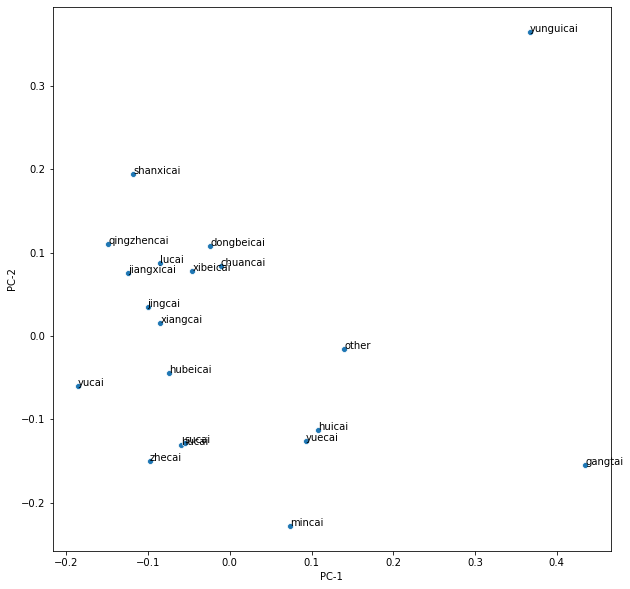

In [12]:
# Step 10: Plot a scatterplot of PC-2 against PC-1
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=PCAdf['PC-1'], y=PCAdf['PC-2'])
for i in range(PCAdf.shape[0]):
    plt.text(x=PCAdf['PC-1'][i], y=PCAdf['PC-2'][i], s=PCAdf['cuisine'][i])
plt.show()

<details>
    <summary><strong>Did you replicate Figure 5? Click here once to see what we got</strong></summary>
    <br>
    <img src="https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/PCAScatterPlot.png">
    <br>
    <div>We managed to get a plot that is similar, but not so similar to Figure 5. That's ok because the general patterns are observed.</div>
</details>

### Optional: Fix the the vectorization
If you noticed, in Step 7, you got a DataFrame with 20 rows and 2,902 columns. Do you see what's wrong? 

There are 2,911 unique ingredients, which means you should get a DataFrame with 2,911 columns. 

9 columns are missing, and you will have to investigate. 

This part is optional because it does not affect the Section's conclusion, i.e. the replication is ok.

For the investigation of the columns, there are a few ways you can do it, but here's what we recommend:
1. Take the columns from the TF-IDF DataFrame
2. Turn it into a set (Set 1)
3. Take the list of unique ingredients in the entire dataset
4. Turn it into a set (Set 2)
5. Get the difference between the two sets

In [13]:
# Find out what are the missing 9 ingredients
Set1 = set(tfidf.columns)

LOI = []
for i in FileList:
    table = pd.read_csv(i)
    LOI+=list(table['ingredient'])
    
Set2 = set(map(str, LOI))

Set2.difference(Set1)

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

### Modify Step 3 to add an underscore to the single digit ingredients
That's right! The missing 9 ingredients are numbered 1-9. 

Somehow, during vectorization, numbers between 1-9 were removed. The way to avoid this is to add an underscore to the numbers, e.g., '1_', '2_', ... , '9_'

The easiest place to perform this modification is Step 3, when you were taking the 'ingredient' column from the cuisine DataFrames.

In [14]:
table = pd.read_csv('/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/yuecai.csv')
to_replace = ['1','2','3','4','5','6','7','8','9']
value = ['1_','2_','3_','4_','5_','6_','7_','8_','9_']

LOI2 = []
for i in FileList:
    table = pd.read_csv(i)
    LOI2.append(list(table['ingredient'].astype(str).replace(to_replace, value)))
    
LOI2

[['250',
  '143',
  '165',
  '359',
  '286',
  '14',
  '102',
  '181',
  '4_',
  '263',
  '12',
  '21',
  '55',
  '318',
  '91',
  '37',
  '13',
  '2273',
  '97',
  '2274',
  '40',
  '43',
  '437',
  '25',
  '860',
  '17',
  '4_',
  '427',
  '13',
  '280',
  '12',
  '28',
  '419',
  '20',
  '2_',
  '46',
  '43',
  '147',
  '174',
  '44',
  '19',
  '36',
  '12',
  '37',
  '11',
  '21',
  '22',
  '33',
  '4_',
  '14',
  '117',
  '624',
  '437',
  '530',
  '44',
  '264',
  '280',
  '12',
  '4_',
  '14',
  '13',
  '10',
  '91',
  '20',
  '134',
  '437',
  '25',
  '44',
  '280',
  '12',
  '19',
  '22',
  '1151',
  '13',
  '34',
  '4_',
  '14',
  '2275',
  '2276',
  '43',
  '11',
  '4_',
  '14',
  '12',
  '13',
  '163',
  '62',
  '881',
  '12',
  '60',
  '14',
  '129',
  '11',
  '33',
  '4_',
  '553',
  '45',
  '1437',
  '114',
  '268',
  '113',
  '10',
  '91',
  '4_',
  '14',
  '129',
  '928',
  '58',
  '53',
  '2_',
  '36',
  '54',
  '505',
  '10',
  '116',
  '102',
  '12',
  '13',
  '55',

### Repeat Steps 5-10 with modified data
Now that you're done adding an underscore to the single digits, this is what you'll see after Step 6:

![IngredientTextDataFrameModified](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/IngredientTextDataFrameModified.png)

Once you get this, proceed with the subsequent steps and you'll get a vectorized DataFrame of 20 rows with 2,911 rows. After that, plot the scatterplot of the PCA components again. 

Is there any difference?

tfidf shape:  (20, 2911)
pca explained variance ratio:  [0.22243314 0.16817635]


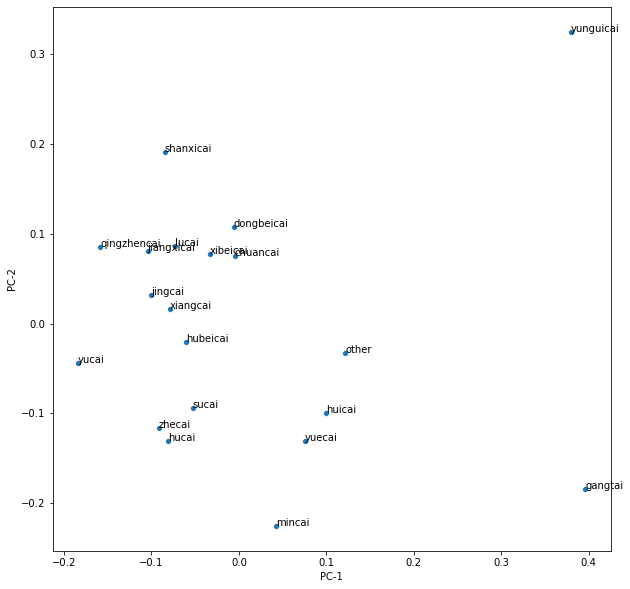

In [15]:
# Repeat Steps 5-10


# Step 5: Join the items in each list
StrIngredients2 = []
for i in LOI2:
    StrIngredients2.append(' '.join(i))


# Step 6: Create an ingredient text DataFrame
CuisineText2 = pd.DataFrame({'cuisine':CuisineNames, 'text':StrIngredients2})
CuisineText2


# Step 7: Get a DataFrame of the vectorized ingredients
import scipy.sparse
v2 = TfidfVectorizer()
vTrans2 = v2.fit_transform(CuisineText2['text'])
tfidf2 = pd.DataFrame.sparse.from_spmatrix(data=vTrans2, columns=v2.get_feature_names())
print("tfidf shape: ", tfidf2.shape)


# Step 8a: Declare a PCA object with n_components of 2
pca3 = PCA(n_components=2)
# Step 8b: Fit transform the DataFrame from Step 7
pca4 = pca3.fit_transform(tfidf2.sparse.to_dense())
# Step 8c: Check the sum of the .explained_variance_ratio
print("pca explained variance ratio: ", pca3.explained_variance_ratio_)


# Step 9: Create a DataFrame using the PCA array
PCAdf2 = pd.DataFrame({'cuisine':CuisineNames, 'PC-1':list(map(operator.itemgetter(0), pca4)), 'PC-2':list(map(operator.itemgetter(1), pca4))}).sort_values(by='cuisine')


# Step 10: Plot a scatterplot of PC-2 against PC-1
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=PCAdf2['PC-1'], y=PCAdf2['PC-2'])
for i in range(PCAdf2.shape[0]):
    plt.text(x=PCAdf2['PC-1'][i], y=PCAdf2['PC-2'][i], s=PCAdf2['cuisine'][i])
plt.show()

## Replicate Figure 6
Now that we have replicated Figure 5 successfully, it's time to analyze Figure 6. 

In Figure 6, the authors wanted to see the relationship between topological distance of cuisine nodes and physical distance. 

![Figure6](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure6.png)

This culminates in a boxplot, where there is a correlation between the two. 

We will replicate Figure 6 using the data from the following files:
- ```Chinese-cuisine-master/code/data/real_result/geographic distance.txt```
- ```Chinese-cuisine-master/code/data/real_result/topological distance.txt```

You can find these files if you unzipped the entire folder from the Github repository.

### Step 11: Read "geographic distance.txt" into a DataFrame
Use .read_csv to read the geographic distance file (yes you can use that to read txt files).

![GeographicDistanceDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/GeographicalDistanceDataFrame.png)

Figure out what's a good character to use for the <strong>sep</strong> parameter, and make sure you don't have any header in your DataFrame.

You'll have a 20 x 20 symmterical DataFrame of the distances. 

In [16]:
# Step 11: Read 'geographic distance.txt' into a DataFrame
GeoDist = pd.read_csv('/Users/sm/Desktop/Chinese-cuisine-master/code/data/real_result/geographic distance.txt', header=None, sep=" ")
GeoDist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,1309.90,1543.70,538.46,1193.20,769.21,1011.60,532.61,1054.20,1617.00,712.50,728.90,890.33,366.20,0,2604.5,415.62,1071.30,360.96,1673.50
1,1309.90,0.00,1105.20,1307.40,1441.70,1427.00,776.57,1161.70,2321.70,1237.10,871.76,1552.20,1035.10,1493.10,0,2182.4,1099.40,750.89,951.60,527.06
2,1543.70,1105.20,0.00,1131.80,693.89,1045.00,562.08,1048.10,2543.30,132.01,839.21,1213.30,670.26,1888.80,0,3281.7,1639.50,1671.50,1298.00,919.20
3,538.46,1307.40,1131.80,0.00,663.17,236.14,705.56,146.10,1420.60,1176.20,454.00,266.17,468.75,900.19,0,3012.1,863.79,1348.60,566.99,1532.40
4,1193.20,1441.70,693.89,663.17,0.00,468.92,665.61,670.05,2041.50,669.25,698.93,610.96,445.49,1558.70,0,3463.2,1455.00,1763.10,1107.50,826.18
5,769.21,1427.00,1045.00,236.14,468.92,0.00,730.26,325.61,1573.70,1064.50,557.68,169.13,449.05,1125.70,0,3230.9,1098.50,1550.60,789.33,1586.60
6,1011.60,776.57,562.08,705.56,665.61,730.26,0.00,580.94,2046.60,664.62,300.52,886.38,285.76,1341.10,0,2850.2,1077.50,1177.70,738.72,857.34
7,532.61,1161.70,1048.10,146.10,670.05,325.61,580.94,0.00,1495.50,1106.10,312.19,402.28,378.04,898.27,0,2905.7,796.03,1227.90,468.41,1392.40
8,1054.20,2321.70,2543.30,1420.60,2041.50,1573.70,2046.60,1495.50,0.00,2595.60,1746.60,1436.80,1873.10,843.68,0,2988.6,1247.50,1896.70,1401.60,2718.40
9,1617.00,1237.10,132.01,1176.20,669.25,1064.50,664.62,1106.10,2595.60,0.00,924.96,1229.80,729.98,1969.00,0,3413.0,1737.70,1795.20,1390.70,1041.20


### Step 12: Read "topological distance.txt" into a DataFrame
You know the drill - next read 'topological distance.txt' into a DataFrame.

![TopologicalDistanceDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/TopologicalDistanceDataFrame.png)

You'll get a 20 x 20 DataFrame containing the topological distances, and this time the DataFrame is asymmetrical.

In [17]:
# Step 12: Read 'topogical distance.txt' into a DataFrame
TopoDist = pd.read_csv('/Users/sm/Desktop/Chinese-cuisine-master/code/data/real_result/topological distance.txt', header=None, sep="\t")
TopoDist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,1,1,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,3,5,3,5,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
9,4,3,1,4,2,3,2,3,6,0,0,0,0,0,0,0,0,0,0,0


### Step 13: Combine the two DataFrames together
The values at positions $i$, $j$ in one DataFrame corresponds to another.

For example, $geodist_{1,0}$ corresponds to $topodist_{1,0}$, with 1309.90 and 3 respectively.

![TopoGeoDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/TopoGeoDataFrame.png)

We'll have to create a DataFrame that contains the topological distance of the cuisines and the corresponding geographical distance.

It will have:
- 190 rows
- 2 columns

In [18]:
# Step 13: Combine the two DataFrames together
GeoDist2 = GeoDist.copy()
meltedGeo=pd.melt(GeoDist2.reset_index(), id_vars='index', value_vars=GeoDist2.columns).rename({'index':'loc1','variable':'loc2'}, axis=1)
meltedGeo=meltedGeo[meltedGeo.loc1>meltedGeo.loc2].reset_index(drop=True)


TopoDist2 = TopoDist.copy()
meltedTopo=pd.melt(TopoDist2.reset_index(), id_vars='index', value_vars=TopoDist2.columns).rename({'index':'loc1','variable':'loc2'}, axis=1)
meltedTopo=meltedTopo[meltedTopo.loc1>meltedTopo.loc2].reset_index(drop=True)

CombineDist = pd.merge(meltedTopo, meltedGeo, how='left', on=['loc1','loc2']).rename({'value_x':'topological distance','value_y':'physical distance'}, axis=1)
CombineDist

,loc1,loc2,topological distance,physical distance
0,1,0,3,1309.90
1,2,0,3,1543.70
2,3,0,1,538.46
3,4,0,3,1193.20
4,5,0,2,769.21
...,...,...,...,...
185,18,16,1,355.78
186,19,16,4,1534.40
187,18,17,1,804.42
188,19,17,2,1214.50


<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Declare an empty list (List_1)</li>
        <li>Declare another empty list (List_2)</li>
        <li>Use a for loop in the range with topo/geo DataFrame's length. In each loop (Loop_1):</li>
        <ol>
            <li>Use another for loop in the range with topo/geo DataFrame's length. In each loop (Loop_2)</li>
            <ol>
                <li>If Loop_1's current value (Value_1) is more than Loop_2's current value (Value_2):</li>
                <ul>
                    <li>Use iloc to find what the value is at position (Value_1, Value_2) for the topo DataFrame</li>
                    <li>Append that value into List_1</li>
                    <li>Do the same for positon (Value_1, Value_2) for geo DataFrame</li>
                    <li>Append that value into List_2</li>
                </ul>
            </ol>
        </ol>
        <li>Use List_1 and List_2 to create a DataFrame</li>
    </ol>
</details>

### Step 14: Remove rows that contain 0
Before we plot the boxplot, let's remove any rows that contain 0. The reason why there are rows with 0 is because rows with 0 fall under "other" cuisine. 

You'll end up with a DataFrame with:
- 171 rows
- 2 columns

In [19]:
# Step 14: Remove rows containing 0
FilterDist = CombineDist[(CombineDist[['topological distance', 'physical distance']]!=0).any(axis=1)]
FilterDist

,loc1,loc2,topological distance,physical distance
0,1,0,3,1309.90
1,2,0,3,1543.70
2,3,0,1,538.46
3,4,0,3,1193.20
4,5,0,2,769.21
...,...,...,...,...
185,18,16,1,355.78
186,19,16,4,1534.40
187,18,17,1,804.42
188,19,17,2,1214.50


### Step 15: Plot a boxplot
The moment of truth.

Plot your boxplot with topological distance at the x-axis and physical distance at the y-axis.

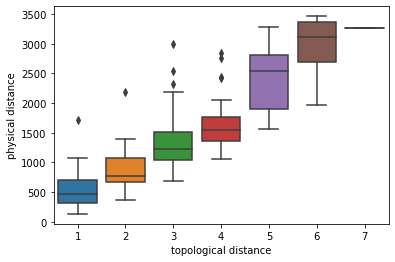

In [20]:
# Step 15: Plot a boxplot
sns.boxplot(x='topological distance', y='physical distance', data=FilterDist)
plt.show()

### Step 16: Modify physical distance
The boxplot looks like Figure 6, but the values are slightly off.

To match Figure 6 completely, you'll have to multiply the values in the list with physical distance by 2.

In [21]:
# Step 16: Multiply list with physical distance by 2
FilterDist['2*physical distance'] = FilterDist['physical distance']*2
FilterDist

<ipython-input-21-cba2f1b90edd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FilterDist['2*physical distance'] = FilterDist['physical distance']*2


,loc1,loc2,topological distance,physical distance,2*physical distance
0,1,0,3,1309.90,2619.80
1,2,0,3,1543.70,3087.40
2,3,0,1,538.46,1076.92
3,4,0,3,1193.20,2386.40
4,5,0,2,769.21,1538.42
...,...,...,...,...,...
185,18,16,1,355.78,711.56
186,19,16,4,1534.40,3068.80
187,18,17,1,804.42,1608.84
188,19,17,2,1214.50,2429.00


### Step 17: Plot the boxplot again
Now that you've multipliedd the values of the physical distance by 2, time to replot the boxplot and see if it matches Figure 6.

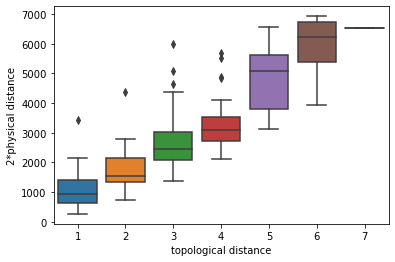

In [22]:
# Step 17: Plot boxplot
sns.boxplot(x='topological distance', y='2*physical distance', data=FilterDist)
plt.show()

<details>
    <summary><strong>What'd you think? Click once to see what we think</strong></summary>
    <div>While we were able to replicate the Figure completely, it's also useful to investigate if it is "correct" to multiply the distances like that.</div>
    <br>
    <div>We won't give anything away, but you can try to investigate which of the distances is correct, i.e. pre-multiplication or post-multiplication.</div>
</details>

## Replicate Figure 7
Next up, the authors plotted the number of spices per recipe vs mean annual temperature of the locations of the cuisines.

![Figure7](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure7.png)

The data that we need are located in four places:
- ```Chinese-cuisine-master/code/data/real_result/climate.txt```
- The .txt files in ```Chinese-cuisine-master/code/data/network/meat-based recipe/```
- The list of spice IDs in ```Chinese-cuisine-master/code/cal_spices_temperature.m```
- The CSV files in ```cuisine_recipe_ingredient_CSV```

### Step 18: Read climate.txt into a DataFrame
Firstly, read climate.txt into a DataFrame. You might have to figure out what additional parameters to use if you're stuck.

If you do it successfully, you'll have a DataFrame that has:
- 20 rows
- 2 columns

In [286]:
# Step 18: Read climate.txt into a DataFrame
Climate = pd.read_csv('/Users/sm/Desktop/Chinese-cuisine-master/code/data/real_result/climate.txt', header=None, sep="\s+")
Climate

,0,1
0,13.90,62
1,17.20,80
2,22.00,78
3,15.60,80
4,19.50,79
5,16.20,81
6,17.10,81
7,15.30,75
8,5.30,68
9,22.80,75


<details>
    <summary><strong>Click here once for a hint</strong></summary>
    <div>Google "How to make separator in pandas read_csv more flexible wrt whitespace, for irregular separators?"</div>
</details>

### Step 19: Get lists from cal_spices_temperature 
We'll also need to get two lists from ```cal_spices_temperature.m```:
- spice_id
- caixi_name

spice_id contains the ingredient ids of spices, which we wil need later. This list will have 213 items.

caixi_name contains the names of the cuisines. This list will have 20 items.

In [24]:
from oct2py import octave as oct
oct.eval("cd /Users/sm/Desktop/Chinese-cuisine-master/code")
oct.eval("cal_spices_temperature")
oct.eval("save -v7 myworkspace.mat")

correlation coefficient (temperature and spice usage, with outliers):-0.29812  p-value=0.1046
correlation coefficient (temperature and spice usage, with outliers----- meat-based recipes):-0.19505  p-value=0.2169
correlation coefficient (temperature and spice usage, without outliers):-0.24375  p-value=0.1753
correlation coefficient (temperature and spice usage, without outliers----- meat-based recipes):-0.18285  p-value=0.2399
    __axis_label__ at line 36 column 6
    xlabel at line 59 column 8
    cal_spices_temperature at line 140 column 1
    _pyeval at line 48 column 11

    __axis_label__ at line 36 column 6
    xlabel at line 59 column 8
    cal_spices_temperature at line 140 column 1
    _pyeval at line 48 column 11



In [25]:
# Step 19: Get lists from cal_spices_temperature
#pd.read_csv('/Users/sm/Desktop/Chinese-cuisine-master/code/cal_spices_temperature.m')
from scipy.io import loadmat
D = loadmat("/Users/sm/Desktop/Chinese-cuisine-master/code/myworkspace.mat")
caixi_name, spice_id = D['caixi_name'], D['spice_id']

### Step 20: Add caixi_name into Step 18 DataFrame and sort
Add caixi_name into the DataFrame from Step 18 as a column called "cuisine".

After that, sort the DataFrame by "cuisine" column in an alphabetical order. 

![TemperatureDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/TemperatureDataFrame.png)

In [26]:
caixi_name

array([[array(['lucai'], dtype='<U5'), array(['chuancai'], dtype='<U8'),
        array(['yuecai'], dtype='<U6'), array(['sucai'], dtype='<U5'),
        array(['mincai'], dtype='<U6'), array(['zhecai'], dtype='<U6'),
        array(['xiangcai'], dtype='<U8'), array(['huicai'], dtype='<U6'),
        array(['dongbeicai'], dtype='<U10'),
        array(['gangtai'], dtype='<U7'),
        array(['hubeicai'], dtype='<U8'), array(['hucai'], dtype='<U5'),
        array(['jiangxicai'], dtype='<U10'),
        array(['jingcai'], dtype='<U7'), array(['other'], dtype='<U5'),
        array(['qingzhencai'], dtype='<U11'),
        array(['shanxicai'], dtype='<U9'),
        array(['xibeicai'], dtype='<U8'), array(['yucai'], dtype='<U5'),
        array(['yunguicai'], dtype='<U9')]], dtype=object)

In [252]:
spice_id

array([[   4.,    9.,   14.,   21.,   36.,   55.,   64.,   66.,   68.,
          69.,   70.,   71.,   73.,   75.,   83.,   87.,   88.,   95.,
         101.,  102.,  103.,  112.,  115.,  125.,  129.,  131.,  142.,
         165.,  179.,  181.,  199.,  200.,  201.,  202.,  203.,  204.,
         207.,  235.,  238.,  246.,  247.,  256.,  267.,  277.,  286.,
         313.,  320.,  337.,  344.,  345.,  351.,  359.,  363.,  369.,
         401.,  402.,  414.,  415.,  416.,  418.,  427.,  464.,  474.,
         475.,  478.,  499.,  501.,  514.,  516.,  521.,  534.,  552.,
         559.,  586.,  590.,  618.,  622.,  623.,  650.,  651.,  663.,
         675.,  697.,  698.,  709.,  711.,  714.,  733.,  736.,  748.,
         757.,  769.,  775.,  792.,  808.,  809.,  812.,  821.,  825.,
         833.,  837.,  843.,  868.,  887.,  888.,  892.,  898.,  923.,
         941.,  951.,  979., 1002., 1012., 1024., 1042., 1061., 1080.,
        1107., 1130., 1153., 1160., 1200., 1217., 1290., 1315., 1354.,
      

In [287]:
# Step 20a: Add a column named "cuisine" using caixi_name
Climate['cuisine']=list(map("".join, caixi_name.flatten()))
Climate

,0,1,cuisine
0,13.90,62,lucai
1,17.20,80,chuancai
2,22.00,78,yuecai
3,15.60,80,sucai
4,19.50,79,mincai
5,16.20,81,zhecai
6,17.10,81,xiangcai
7,15.30,75,huicai
8,5.30,68,dongbeicai
9,22.80,75,gangtai


In [288]:
# Step 20b: Sort the DataFrame by 'cuisine'
Climate.sort_values(by='cuisine', inplace=True)
Climate

,0,1,cuisine
1,17.20,80,chuancai
8,5.30,68,dongbeicai
9,22.80,75,gangtai
10,16.40,78,hubeicai
11,15.60,80,hucai
7,15.30,75,huicai
12,17.50,80,jiangxicai
13,11.60,60,jingcai
0,13.90,62,lucai
4,19.50,79,mincai


### Step 21: Get lists of filenames
Using glob, get a list of filenames for two folders:
- ```cuisine_recipe_ingredient_CSV```
- ```Chinese-cuisine-master/code/data/network/meat-based recipe```

In [129]:
# Step 21: Get a list of .CSV filenames
CuisineRecipeIngredient = sorted(glob("/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/*.csv"))
MeatBasedRecipe = sorted(glob("/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/*.txt"))

In [139]:
CuisineRecipeIngredient

['/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/chuancai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/dongbeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/gangtai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hubeicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/hucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/huicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/jiangxicai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/jingcai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/lucai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/mincai.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/other.csv',
 '/Users/sm/Desktop/CourseMaterials/cuisine_recipe_ingredient_CSV/qingzhencai.csv',
 '/Users/sm/Desktop/CourseMaterials/

In [140]:
MeatBasedRecipe

['/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/chuancai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/dongbeicai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/gangtai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/hubeicai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/hucai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/huicai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/jiangxicai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/jingcai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chinese-cuisine-master/code/data/network/meat-based recipe/lucai_meat_recipe_id.txt',
 '/Users/sm/Desktop/Chine

![Figure7Strategy](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure7Strategy.png)

Why have we done the things we've done so far? We'll need to do the following steps because according to the publication, this is what's going to happen:
1. Go through each cuisine
2. In each cuisine, pick on recipe_id that contains meat
3. In each recipe_id that contains meat, count how many spices appear
4. Get the average number of spices per cuisine

### Step 22: Read the first meat-based recipe txt
We'll take a look at the first meat-based recipe txt. If you used glob, the list will be sorted alphabetically and the first txt file is for the chuan cuisine.

Read the .txt file into a DataFrame. You'll have a DataFrame that has:
- 890 rows
- 1 column

In [147]:
# Step 22: Read the first meat-based recipe txt
ChuanMeat = pd.read_csv(MeatBasedRecipe[0], header=None)
ChuanMeat

,0
0,0
1,1
2,2
3,4
4,6
...,...
885,1142
886,1143
887,1145
888,1146


### Step 23: Filter the first DataFrame
Read the first CSV in the cuisine list - chuan.csv - into a DataFrame. 

Filter the DataFrame using the list of recipe ids found in Step 22.

The chuan DataFrame starts with 12,068 rows but ends up with 9,753 rows after filtering for recipe_id that contains meat.

In [148]:
# Step 23: Filter the chuan DataFrame 
ChuanUnfiltered = pd.read_csv(CuisineRecipeIngredient[0])
ChuanUnfiltered

,recipe_id,ingredient
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
12063,1147,55
12064,1147,14
12065,1147,22
12066,1147,33


In [149]:
ChuanFiltered = ChuanUnfiltered[ChuanUnfiltered['recipe_id'].isin(ChuanMeat.iloc[:,0])]
ChuanFiltered

,recipe_id,ingredient
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
12063,1147,55
12064,1147,14
12065,1147,22
12066,1147,33


<details>
    <summary><strong>Click here once for a hint</strong></summary>
    <div>Google "Filter dataframe rows if value in column is in a set list of values"</div>
</details>

### Step 24: Get a list of filtered meat DataFrames
Now that you've got the idea, let's loop through all of the CSVs, create DataFrames, and filter them before appending them into a list.

You'll have a list of 20 filtered DataFrames.

In [253]:
# Step 24: Get a list of filtered DataFrames
MeatRecipes = []
for i in range(len(CuisineRecipeIngredient)):
    unfiltered = pd.read_csv(CuisineRecipeIngredient[i])
    MeatFilter = pd.read_csv(MeatBasedRecipe[i], header=None)
    filtered = unfiltered[unfiltered['recipe_id'].isin(MeatFilter.iloc[:,0])]
    MeatRecipes.append(filtered)

MeatRecipes

[       recipe_id  ingredient
 0              0           1
 1              0           2
 2              0           3
 3              0           4
 4              0           5
 ...          ...         ...
 12063       1147          55
 12064       1147          14
 12065       1147          22
 12066       1147          33
 12067       1147          20
 
 [9753 rows x 2 columns],
       recipe_id  ingredient
 0             0         876
 1             0         547
 2             0          19
 3             0         292
 4             0          54
 ...         ...         ...
 3597        357          91
 3598        357         129
 3599        357          14
 3600        357          13
 3601        357           4
 
 [2696 rows x 2 columns],
       recipe_id  ingredient
 0             0          19
 1             0         533
 2             0         222
 3             0        1036
 4             0          33
 ...         ...         ...
 1417        150         400
 141

<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Declare an empty list (List_1)</li>
        <li>Use a for loop in the range with cuisine list length. In each loop (Loop_1):</li>
        <ul>
            <li>Read the cuisine csv into a DataFrame (DF_1)</li>
            <li>Read the meat-recipe into a DataFrame (DF_2)</li>
            <li>Get the list of recipe id with meat from DF_2</li>
            <li>Filter DF_2 with the list (DF_3)</li>
            <li>Append DF_3 into List_1</li>
        </ul>
    </ol>
</details>

### Step 25: Get average number of spices per recipe in one filtered cuisine
Let's check out the average number of spices per recipe in the first filtered cuisine - chuan cuisine with meat only.

There are a few ways to do it, and the easiest approach you can consider is:
- get a list of unique recipe_id
- loop through the unique ids
- filter the DataFrame to contain the current id only
- from the filtered DataFrame, keep count of how many spices are found in the ingredient
- get the average value of the spice count

Using the first item in the list from Step 24, i.e. chuan-meat, you will have:
- 890 unique recipe_ids of dishes with meat
- 3.275 spices used per recipe_id

In [254]:
# Step 25: Get the average number of spices per recipe in one cuisine
Chuan=MeatRecipes[0]
List_1 = Chuan['recipe_id'].unique()
List_2 =[]
for i in List_1:
    Var_1=0
    Var_2=Chuan[Chuan['recipe_id']==i]
    List_3=Var_2['ingredient']
    for j in List_3:
        if j in spice_id.flatten():
            Var_1+=1
    List_2.append(Var_1)
    
sum(List_2)/len(List_2)

3.2752808988764044

<details>
    <summary><strong>Click here once for pseudocode</strong></summary>
    <ol>
        <li>Declare a variable to store the first item in the list of DataFrames from Step 24</li>
        <li>Get the 'recipe_id' column, and get a list of unique recipe_id with .unique() (List_1)</li>
        <li>Declare an empty list (List_2) to store the number of spice per recipe_id</li>
        <li>Use a for loop to loop through each item in List_1. In each loop:</li>
        <ul>
            <li>Declare a variable containing an initial value of zero (Var_1)</li>
            <li>Filter the DataFrame to contain only the current recipe_id value and assign it to a variable (Var_2)</li>
            <li>Get the list of ingredients from Var_2's 'ingredient' column (List_3)</li>
            <li>Use a for loop to loop through List_3. In each loop:</li>
            <ul>
                <li>Check if the current ingredient is in the list of spices from Step 19. If it is:</li>
                <ul>
                    <li>Increment Var_1 by 1</li>
                </ul>
            </ul>
            <li>Append Var_1 into List_2</li>
        </ul>
        <li>Take the sum of List_2 and divide it by the lenght of List_2 to get your average number of spices used per recipe_id in a cuisine</li>
    </ol>
</details>

### Step 26: Get average number of spices used per recipe for all cuisines
Now that you've successfully completed the calculation for one cuisine, it's time to do it for the rest of the cuisines.

![AverageSpicePerCuisineList](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/AverageSpicePerCuisineList.png)

You'll end up with a list containing 20 averages. 

In [255]:
# Step 26: Get average number of spices used per recipe for cuisines
from statistics import mean
AvgSpice=[]
for df in MeatRecipes:
    UniRecipe = df['recipe_id'].unique()
    SpiceCount =[]
    for i in UniRecipe:
        N=df[(df['recipe_id']==i) & (df['ingredient'].isin(spice_id.flatten()))]['ingredient'].shape[0]
        SpiceCount.append(N)
    AvgSpice.append(mean(SpiceCount))

AvgSpice

[3.2752808988764044,
 3.1235521235521237,
 2.438202247191011,
 2.934959349593496,
 2.0755102040816324,
 2.6375838926174495,
 2.684684684684685,
 2.687960687960688,
 2.708029197080292,
 2.2865497076023393,
 2.8157894736842106,
 2.5342465753424657,
 3.127659574468085,
 2.43598615916955,
 3.2670349907918967,
 3.4461538461538463,
 2.1724137931034484,
 2.5662847790507364,
 2.8846153846153846,
 2.231707317073171]

### Step 27: Add the spice average to temperature DataFrame
Create a new column in the DataFrame that you got from Step 20 called "average_spice_num" using the list you got from Step 26.

In [289]:
# Step 27: Update your Step 20 DataFrame
Climate['average_spice_num']=AvgSpice
Climate

,0,1,cuisine,average_spice_num
1,17.20,80,chuancai,3.275281
8,5.30,68,dongbeicai,3.123552
9,22.80,75,gangtai,2.438202
10,16.40,78,hubeicai,2.934959
11,15.60,80,hucai,2.075510
7,15.30,75,huicai,2.637584
12,17.50,80,jiangxicai,2.684685
13,11.60,60,jingcai,2.687961
0,13.90,62,lucai,2.708029
4,19.50,79,mincai,2.286550


### Step 28: Remove the row with 'other' data
Before we plot the temperature and average spice number, remove the row with "other". 

That is because the temperature for 'other' is 0, which will mess your scatterplot up later.

In [290]:
# Step 28: Remove 'other' data
Climate.drop([14], axis=0, inplace=True)
Climate

,0,1,cuisine,average_spice_num
1,17.20,80,chuancai,3.275281
8,5.30,68,dongbeicai,3.123552
9,22.80,75,gangtai,2.438202
10,16.40,78,hubeicai,2.934959
11,15.60,80,hucai,2.075510
7,15.30,75,huicai,2.637584
12,17.50,80,jiangxicai,2.684685
13,11.60,60,jingcai,2.687961
0,13.90,62,lucai,2.708029
4,19.50,79,mincai,2.286550


### Step 29: Plot average_spice_num against temperature
The last Step before we call it a day for this Part - plotting average_spice_num against temperature in a scatterplot.

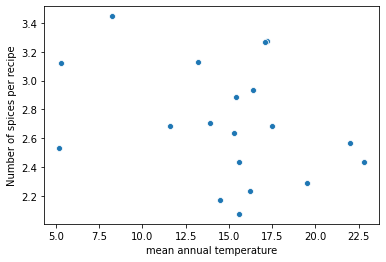

In [297]:
# Step 29: Plot average_spice_num against temperature
ClimatePlot = sns.scatterplot(x=Climate[0], y=Climate['average_spice_num'])
ClimatePlot.set(ylabel = "Number of spices per recipe", xlabel = "mean annual temperature")
plt.show()

<details>
    <summary><strong>What'd you get? Click here to see what we got</strong></summary>
    <img src = 'https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectCuisineNetwork/Figure7vsReproduction.png'>
    <br>
    <div>The reproduction is slightly different from Figure 7, but the pattern remains the same, i.e. there is no correlation between the number of spices in the meat dishes in cuisines and the temperature of the different regions.</div>
</details>

### End of Part III
What a Part! If you have successfully (sort of) replicated all of the figures in the paper, well done to you! If you haven't yet, no worries and come back to the different Sections when you can.

To recap, you have successfully:
1. Prepared a TF-IDF vector of ingredient usage across recipes
2. Performed Principal Component Analysis (PCA) for dimensionality reduction on the dataset
3. Combined data from different sources together for visualization

In the next Part, we will work on replicating the most exciting (and hardest) part of the paper - a simulation that models cuisine evolution in a geographical region.

Put on your best Python hat and head on to Part IV.